In [1]:
import os
import sys

import cv2
import ft_model
import matplotlib.pyplot as plt
import silence_tensorflow
import tensorflow as tf
import tqdm

sys.path.append("../")
import img_preprocess
import settings

# setting tensorflow
silence_tensorflow.silence_tensorflow()
tf.random.set_seed(42)

In [2]:
def model_iu(img, model, only_proba=True, threshold=0.5):
    img = img_preprocess.cnn_preprocess_img(img, settings.IMG_SIZE, predict=True)
    proba = float(model.predict(img)[0][0])

    if only_proba is False:
        if proba >= threshold:
            return proba, "OK"
        else:
            return proba, "NG"

    return proba

In [3]:
def predict_dir(dir_path, model):
    probas = []

    img_names = os.listdir(dir_path)

    for img_name in img_names:
        img_path = os.path.join(dir_path, img_name)
        img = cv2.imread(img_path)

        proba = model_iu(img, model)
        probas.append(proba)

        print(proba)

    return probas

## load base model
---

In [4]:
model = ft_model.Model(settings.IMG_SHAPE, False, False)
model.load_weights("../cnn_model/weight/base_weight/20221129-221745/50")

## predict base model
---

In [5]:
ng_scores = predict_dir("../image/module/true_ng", model)

1/1 [==============================] - 2s 2s/step
9.594784933142364e-05
1/1 [==============================] - 0s 113ms/step
3.563693340424834e-08
1/1 [==============================] - 0s 108ms/step
0.003354559186846018
1/1 [==============================] - 0s 106ms/step
0.0049964068457484245
1/1 [==============================] - 0s 117ms/step
0.001134066958911717
1/1 [==============================] - 0s 117ms/step
0.00018030044157058
1/1 [==============================] - 0s 112ms/step
0.7371261715888977
1/1 [==============================] - 0s 113ms/step
0.002863077213987708
1/1 [==============================] - 0s 110ms/step
8.047251753851015e-08
1/1 [==============================] - 0s 110ms/step
5.191427408135496e-05
1/1 [==============================] - 0s 112ms/step
0.000834659906104207
1/1 [==============================] - 0s 111ms/step
0.00015022065781522542
1/1 [==============================] - 0s 122ms/step
0.0004345551133155823
1/1 [==============================]

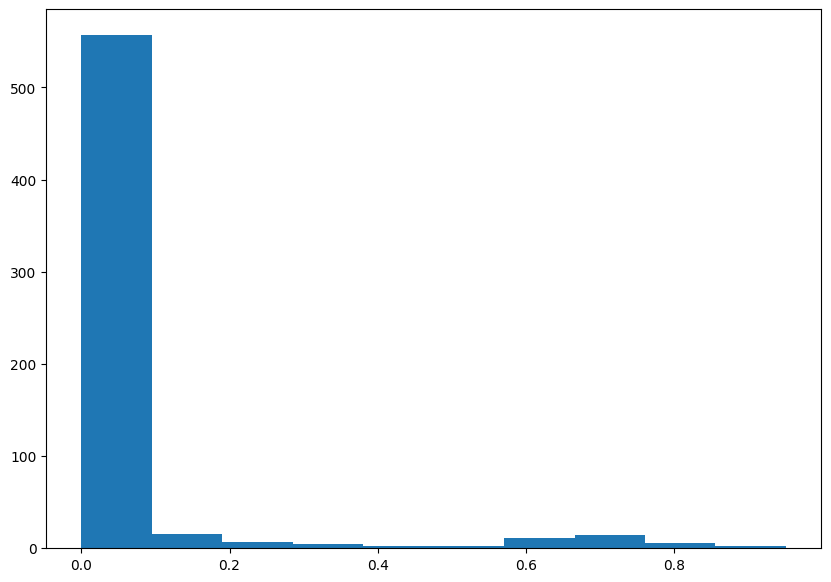

In [6]:
plt.figure(figsize=(10, 7))
plt.hist(ng_scores)
plt.show()

In [7]:
ok_scores = predict_dir("../image/module/true_ok", model)

1/1 [==============================] - 0s 105ms/step
0.8150493502616882
1/1 [==============================] - 0s 109ms/step
0.7777212262153625
1/1 [==============================] - 0s 111ms/step
0.7665868401527405
1/1 [==============================] - 0s 114ms/step
0.7088986039161682
1/1 [==============================] - 0s 111ms/step
0.8364439606666565
1/1 [==============================] - 0s 113ms/step
0.89472895860672
1/1 [==============================] - 0s 118ms/step
0.7443403005599976
1/1 [==============================] - 0s 104ms/step
0.7607025504112244
1/1 [==============================] - 0s 104ms/step
0.7685655355453491
1/1 [==============================] - 0s 108ms/step
0.7929263114929199
1/1 [==============================] - 0s 105ms/step
0.758886992931366
1/1 [==============================] - 0s 104ms/step
0.7799346446990967
1/1 [==============================] - 0s 107ms/step
0.7591083645820618
1/1 [==============================] - 0s 105ms/step
0.761026561260

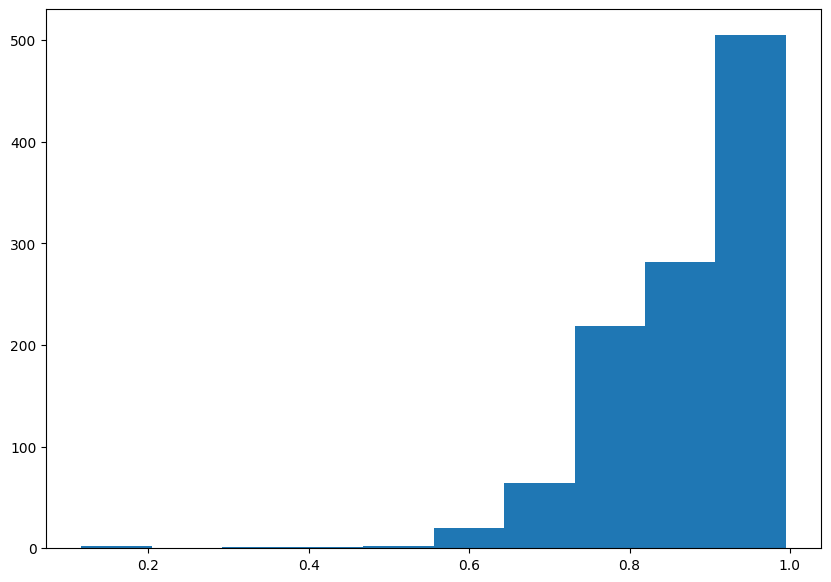

In [8]:
plt.figure(figsize=(10, 7))
plt.hist(ok_scores)
plt.show()

In [9]:
ovk_scores = predict_dir("../image/module/overkill", model)

1/1 [==============================] - 0s 130ms/step
0.7313726544380188
1/1 [==============================] - 0s 129ms/step
0.7399705648422241
1/1 [==============================] - 0s 134ms/step
0.852938175201416
1/1 [==============================] - 0s 136ms/step
0.7478069067001343
1/1 [==============================] - 0s 134ms/step
0.7530261278152466
1/1 [==============================] - 0s 136ms/step
0.7481799125671387
1/1 [==============================] - 0s 128ms/step
0.7457147836685181
1/1 [==============================] - 0s 138ms/step
0.6568471193313599
1/1 [==============================] - 0s 130ms/step
0.8154023289680481
1/1 [==============================] - 0s 132ms/step
0.6800835132598877
1/1 [==============================] - 0s 132ms/step
0.7314189672470093
1/1 [==============================] - 0s 135ms/step
0.6770452857017517
1/1 [==============================] - 0s 135ms/step
0.8393425345420837
1/1 [==============================] - 0s 129ms/step
0.6623491048

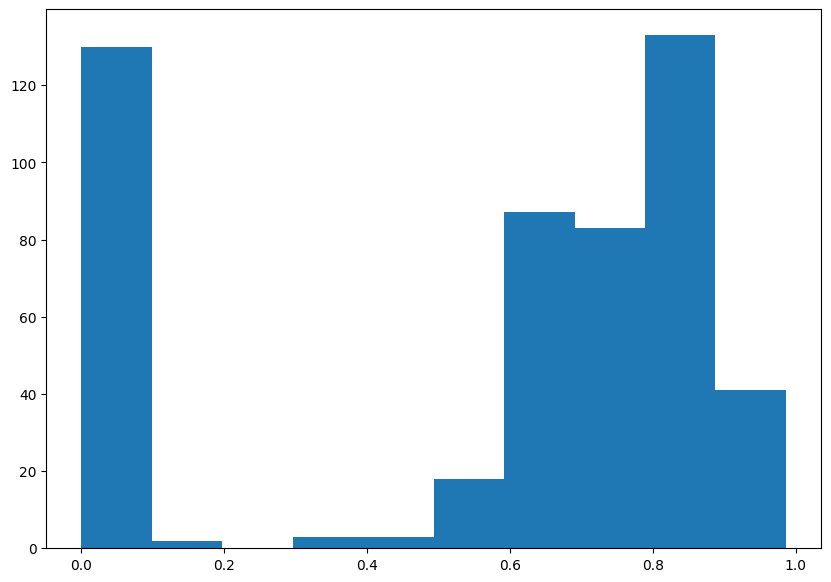

In [10]:
plt.figure(figsize=(10, 7))
plt.hist(ovk_scores)
plt.show()

## get low score from overkill
---

In [16]:
def low_score(dir_path, model):
    low_score = []

    img_names = os.listdir(dir_path)

    for img_name in img_names:
        img_path = os.path.join(dir_path, img_name)
        img = cv2.imread(img_path)

        score = model_iu(img, model)
        
        if score < 0.5:
            low_score.append(img_name)

        print(score)

    return low_score

In [17]:
import pandas as pd

ovk_low = low_score("../image/module/overkill", model)
ovk_df = pd.DataFrame(ovk_low)

ovk_df.to_csv("overkill_low.csv")

1/1 [==============================] - 0s 180ms/step
0.6529897451400757
1/1 [==============================] - 0s 162ms/step
0.6568149924278259
1/1 [==============================] - 0s 170ms/step
0.7098838686943054
1/1 [==============================] - 0s 172ms/step
0.7067253589630127
1/1 [==============================] - 0s 169ms/step
0.6530301570892334
1/1 [==============================] - 0s 172ms/step
0.6613756418228149
1/1 [==============================] - 0s 168ms/step
0.6109613180160522
1/1 [==============================] - 0s 171ms/step
0.6041167974472046
1/1 [==============================] - 0s 171ms/step
0.7233976125717163
1/1 [==============================] - 0s 165ms/step
0.6341598629951477
1/1 [==============================] - 0s 168ms/step
0.6899065971374512
1/1 [==============================] - 0s 169ms/step
0.6408953070640564
1/1 [==============================] - 0s 176ms/step
0.8201305270195007
1/1 [==============================] - 0s 173ms/step
0.600875079